<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*

## Notebook 5: Root finding and bugs

In this Notebook we practice with functions, loops and if statements by coding a rootfinding algorithm ourselves, and we practice with resolving bugs.

### Root finding
Finding the zero of a function is a very common task in exploratory computing. In mathematics it is also called *root finding*. The `scipy` package contains a number of methods to find the (approximate) value of the zero of a function of one or more variables. In this Notebook, we will program the Bisection method ourselves, so that we can practice with functions, loops, and if statements. After that, we use a rootfinding method from `scipy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Bisection method
The Bisection method is a simple method to find the zero of a function. The user needs to specify the function $f(x)$ and two values of $x$ between which $f(x)$ is zero - let's call those two points $x_1$ and $x_2$. As $f(x)$ equals zero somewhere between $x_1$ and $x_2$, that means that $f(x)$ is positive at $x_1$ or $x_2$ and negative at the other one. In other words, the product of the two function values is negative: $f(x_1)f(x_2)<0$. If this condition is fulfilled, all we know is that $f(x)$ is zero somewhere in the interval between $x_1$ and $x_2$ (provided $f(x)$ is continuous, of course). The basic idea of the Bisection method is to iterate towards the zero of the function by cutting the interval in half every iteration. This is done by computing the middle between $x_1$ and $x_2$, let's call that point $x_m$, and compute $f(x_m)$. Next, replace either $x_1$ or $x_2$ by $x_m$ making sure that $f(x)$ remains negative at one of the two values and positive at the other. Repeat the process until the function is close enough to zero. In summary, the algorithm works as follows:

1. Compute $f(x)$ at $x_1$ and $x_2$ and make sure that $f(x_1)f(x_2)<0$.
2. Compute $x_m = \frac{1}{2}(x_1+x_2)$.
3. Compute $f(x_m)$.
4. If $f(x_m)f(x_2)<0$, replace $x_1$ by $x_m$, otherwise, replace $x_2$ by $x_m$.
5. Test whether $|f(x_1)|<\varepsilon$, where $\varepsilon$ is a user-specified tolerance. If this is not yet the case, return to step 2.

Recall that a function may simply be passed as the argument to another function in Python. The example below contains a function called `square_me` that returns the square of any function of one variable, evaluated at the provided value of $x$. As an example, `square_me` is used with the `cos` function

In [2]:
def square_me(func, x):
    return func(x) ** 2
print('result of square_me function:', square_me(np.cos, 4))
print('directly taking the square  :', np.cos(4) ** 2)

result of square_me function: 0.427249983096
directly taking the square  : 0.427249983096


### Exercise 1. <a name="back1"></a>
Write a Python function for $f(x)=x^3+6x^2+11x-6$. Create a plot of $f(x)$ for $x$ varying from -10 to 10. Notice that $f(x)$ has a zero somewhere on the plotted interval.

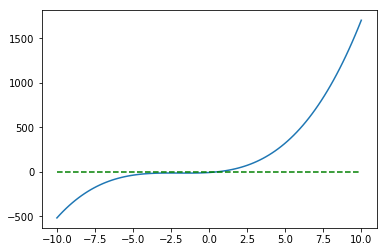

In [3]:
def z(x):
    return x**3 + 6*x**2 + 11*x -6

x = np.linspace(-10,10,100)
y = z(x)

plt.plot(x,y,[-10,10],[0,0],'g--');

### Exercise 2. <a name="back2"></a>Bisection method
Implement the bisection method in a function called `bisection`. Your `bisection` method should take the following arguments:

1. The function for which you want to find the zero.
2. $x_1$ and $x_2$
3. The tolerance `tol` used as a stopping criterion. Make `tol` a keyword argument with a default value of 0.001.
4. The maximum number of iterations `nmax`. Make `nmax` a keyword argument with a default value of, for example, 10.

Your function should return the value of $x$ where $f(x)$ equals (approximately) zero. Your function should print a warning to the screen when the maximum number of iterations is reached before the tolerance is met.

In writing your code, implement steps 2-5 of the algorithm explained above in a regular loop that you perform `nmax` times and break out of the loop (using the `break` command) when the tolerance is met. Doing it this way will prevent you from getting stuck in an infinite loop, which may happen if you use a `while` loop. 
In writing your code, print the values of $x_1$, $x_2$, $f(x_1)$, and $f(x_2)$ to the screen every iteration, so you can see how your `bisection` function performs (or whether you have any bugs left). 

Use your `bisection` method to find the zero of the function $f(x)$ you programmed in Step 1 and make sure it is within `tol=0.001` of the exact value. 

In [19]:
def bisection(func,x1,x2,nmax,tol=1e-3):
    f1 = func(x1)
    f2 = func(x2)
    if f1*f2 < 0:
        for i in range(nmax):
            xm = 0.5*(x1+x2)
            fm = func(xm)
            if fm*f2 < 0:
                x1 = xm
            else:
                x2 = xm
            #print('In loop',i,', x is:',xm,'. f(x1):',round(funci(x1),6),'. f(x2):',round(funci(x2),6),'. f(xm):',round(funci(xm),6))  
            if np.abs(func(x1)) <= tol:
                #print('Binnen toleratie',np.abs(funci(x1)))
                break
            if i==nmax-1:
                print('Toleration not met within the iteration limit!')
    else:
        xm = '-'
        i = '-'
        print('The x-axis isnt crossed')
    return xm , func(x1), i

In [5]:
xzero = bisection(func=z, x1=0, x2=4, nmax=20, tol=0.001)  
print('zero of function and function value: ', xzero[0],xzero[1])

zero of function and function value:  0.434814453125 -0.0004517741472227499


Demonstrate that your `bisection` method works correctly by finding the zero of cos($x$) between $x_1=0$ and $x_2=3$ running the following command:

`bisection(np.cos, 0, 3, tol=1e-6, nmax=30)`

In [20]:
print('X,Y,Iterations->',bisection(np.cos,0,3,tol=1e-6,nmax=30))

X,Y,Iterations-> (1.570796012878418, 3.1391647865047618e-07, 19)


### Root finding methods in `scipy`
The package `scipy.optimize` includes a number of routines for the minimization of a function and to find the zeros of a function. One of the rootfinding methods is called, no suprise, `bisect`. But possibly the most popular root finding method is called `fsolve`. 

### Exercise 3.<a name="back5"></a> `fsolve` 
Use the `fsolve` method of the `scipy.optimize` package to find the $x$ value for which $e^{\sqrt{x}}=5$ (i.e., find the zero of the function $e^{\sqrt{x}}-5$), and demonstrate that your value of $x$ indeed gives $e^{\sqrt{x}}=5$.

In [7]:
import scipy.optimize as sco

def f(x):
    return np.exp(x**0.5)-5

x = sco.fsolve(f,0)
print('X,f(x)->',x[0],f(x[0])+5)



X,f(x)-> 2.59029039398 5.0


### Exercise 4.<a name="back6"></a> Plot the zero
Plot the function $f(x)=x+2\cos(x)$ for $x$ going from -2 to 4. On the same graph, plot a red dot at the location where $f(x)=0$. Obviously, you need to find this location with one of the methods you learned in this Notebook. 

X-axis is crossed at:  -1.0298665296286345 -8.31644531019e-10 . With 29 iterations.
X-axis is crossed at:  -1.02986652932 -> Using fsolve.


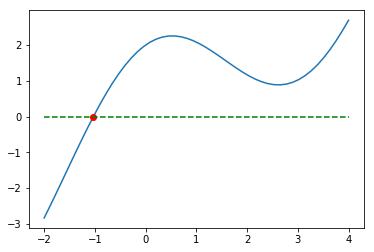

In [8]:
def y(x):
    return x+2*np.cos(x)

f0 = bisection(y,-2,4,tol=1e-8,nmax=30)
f1 = sco.fsolve(y,-1)

x = np.linspace(-2,4,50)
y = y(x)

print('X-axis is crossed at: ',f0[0],f0[1],'. With',f0[2],'iterations.')
print('X-axis is crossed at: ',f1[0],'-> Using fsolve.')
plt.plot(x,y,f0[0],f0[1],'ro',[-2,4],[0,0],'g--');

### Bugs
It happens to anyone writing code: occasionally, you make errors. Errors in your code, known as bugs, can be roughly divided in two kinds. The first kind are syntax errors, where Python throws an error message at you. Once you have resolved all the syntax errors, this means your code will run, but it doesn't mean, unfortunatley, that you get the answer you want. There may be one or more bugs remaining in your logic. To find these bugs, it often helps to test small parts of the code separately and to write lots of print statements. There also exist tools called debuggers, which help you in stepping through the code to look at intermediate results. They do not, unfortunately, tell you what the bug is, that is still up to you, the programmer. 

In this Notebook, we will discuss a number of syntax errors. Syntax errors can be very long as they provide a traceback from the function that throws the error all the way back to the code that you wrote. The strategy to find out what is going on is to read the last sentence of the error message. This error message is designed to tell you what you are doing wrong. Sometimes it is easy for Python to figure out what is wrong and the error message is very informative. Other times you make a more confusing error and Python throws an error message that doesn't help much in explaining what you did wrong. A second important piece of information is that Python shows you in what line of your code things went haywire. It prints a few lines of your code to the screen and points to the line where the error occurred with an arrow. The examples Notebook are by no means exhaustive. A number of syntax errors are discussed so that you may start recognizing them and give you some practice in trying to resolve errors. 

**In all the examples below, you must fix the error so that the entire Notebook kan be run by selecting Kernel - Restart & Run All when you are done with the Notebook**

### `IndexError: list index out of range`
As a first example, run the code below

In [9]:
x = [1, 2, 3]
for i in range(3):
    print(x[i])

1
2
3


You will get an error message `IndexError: list index out of range` and an arrow at the line of the code where this happened. This makes immediate sense, as the length of the array `x` is 3 (so `x[0]`, `x[1]`, and `x[2]`), while you are trying to print `x[3]`. Fix the code and run it again.

### `invalid syntax`
A common error message is `invalid syntax`. This means you are trying to do something that Python doesn't understand. This could very well be a typo, which you can often spot by looking carefully at the code. For example, run the code below

In [10]:
a = 7 
if a == 8:
    print('the value of a equals 8')

Similarly, if you forget to add a colon, you get a `invalid syntax` error. Python shows with the carrot (`^`) where it doesn't understand what is going on.

In [11]:
avalue = 7 
if avalue < 10:
    print('the value of avalue is smaller than 10')

the value of avalue is smaller than 10


In this case, the error is that the statement `a = 8` needs to have two equal signs. Fix it and run the code again. 

Other times, the syntax error may not be so obvious, for example, in the code below 

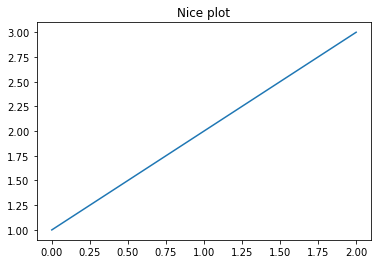

In [12]:
plt.plot([1,2,3])
plt.title('Nice plot')

You can stare all you want at the line `plt.title('Nice plot')` but it looks perfectly good. And it is! The problem lies with the line just above it, where the closing parenthesis is missing. Python thinks that the plotting statement continuous on the next line, but the `plt.title` command makes no sense in the `plt.plot` function, so it throws an error message. There is not much else it can do. Fix the parenthesis and run the code again. 

### Longer error messages
Error messages can be rather long, depending where in the code the error occurs. In the code below, the error occurs in the line `plt.plot(xdata, ydata)`, which calls a function in the `matplotlib` package, which throws the error when it tries to plot `y` vs. `x` (which is a generic error message from `matplotlib`; it doesn't substitute the names of the arrays you really want to plot). Run the code

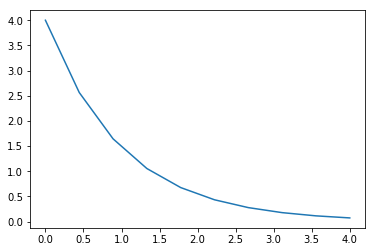

In [13]:
def func_exp(x, a=2, b=3):
    return b * np.exp(-a * x)

xdata = np.linspace(0, 4, 10)
ydata = func_exp(xdata, b=4, a=1)

plt.plot(xdata, ydata);

Again, the code looks perfectly fine, but `matplotlib` complains that `x and y must not be None`. Note that `x` and `y` refer to `xdata` and `ydata`, because that is the statement in the code. Apparently, either `xdata` or `ydata` equals `None`. The thing to do here is to print `xdata` and `ydata` to the screen. 

In [14]:
print(xdata)
print(ydata)

[ 0.          0.44444444  0.88888889  1.33333333  1.77777778  2.22222222
  2.66666667  3.11111111  3.55555556  4.        ]
[ 4.          2.56472155  1.64444916  1.05438855  0.67605326  0.43347209
  0.2779338   0.1782057   0.114262    0.07326256]


As you see, it turns out that `xdata` is indeed an array with 10 values, but `ydata` is `None`. The error lies in the function `func_exp` that is defined. This function doesn't return the value of `y` that is computed. Fix the function and run the code again. 

### Exercises
The best way to learn how to resolve errors in your code is by practice.
Consider the following code snippets. Each code snippet contains at least two errors. It is up to you to fix the error so that the code runs properly. Note that you will need to make changes to only one or two lines in each code snippet and you are not allowed to delete lines. 

#### Exercise 5a. Bar graph of grades

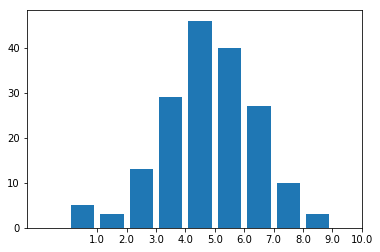

In [15]:
grades = np.loadtxt('numbers2016.txt')
total = np.zeros(10)
for i in range(10):
    for j in range(len(grades)):
        if grades[j] == i+1:
            total[i] += 1

plt.bar(range(10), total)
plt.xticks(np.linspace(1.5, 10.5, 10), np.linspace(1, 10, 10));

#### Exercise 5b. Plot a function

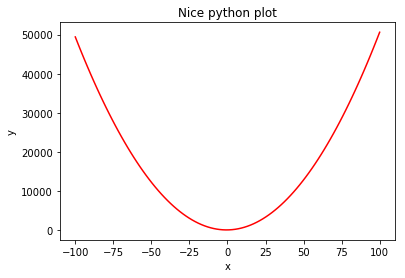

In [16]:
def func(x):
    return 5 * x ** 2 + 6*x + 3
x = np.linspace(-100, 100, 100)
plt.plot(x, func(x), 'r')
plt.title('Nice python plot')
plt.xlabel('x')
plt.ylabel('y');

#### Exercise 5c. Image of an array

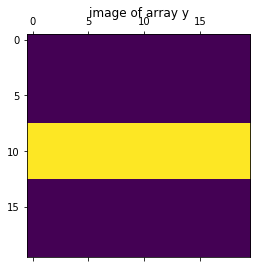

In [17]:
y = np.zeros([20, 20])
y[8:13] = 10
plt.matshow(y)
plt.title('image of array y');

### Exercise 5d. Figure with legend

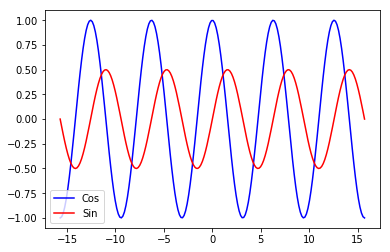

In [18]:
x = np.linspace(-5 * np.pi, 5 * np.pi, 200)
y1 = np.cos(x)
y2 = 0.5 * np.sin(x)
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'r')
plt.legend(['Cos','Sin'],loc='best');